In [1]:
#Importing all necessary packages
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pandas import read_excel, merge
from IPython.core.display import HTML
css_file = 'style.css'
from numpy import nan
import sklearn
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pylab as pl
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Final_Dataset.csv',sep=' ')
df.head()

,HCM2,PREDDEG,HIGHDEG,CONTROL,LOCALE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,...,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV
0,0,3,3,2,12.0,0.0,0.0,0.0,0.0,0.0,...,20676.000000,21980.000000,24681.0,0.1992,0.8608,0.54012,0.461533,0.27298,0.4633,0.0141
1,0,2,2,1,41.0,0.0,1.0,0.0,0.0,0.0,...,21999.500000,24233.000000,24231.0,0.6050,0.6538,0.54440,0.230767,0.20630,0.3058,0.3604
2,0,2,3,2,32.0,1.0,0.0,0.0,0.0,0.0,...,23323.000000,26486.000000,23781.0,0.9048,0.4468,0.54860,0.000000,0.25940,0.9249,0.1294
3,0,3,4,3,12.0,0.0,0.0,0.0,0.0,0.0,...,23408.000000,27628.000000,23331.0,0.6922,0.4400,0.55280,0.125000,0.31250,0.7304,0.6109
4,0,2,2,1,32.0,0.0,0.0,0.0,0.0,0.0,...,23832.666667,26274.333333,22881.0,0.4928,0.4823,0.55700,0.250000,0.36560,0.2128,0.2896


In [3]:
df.shape

(7583, 108)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7583 entries, 0 to 7582
Columns: 108 entries, HCM2 to UG25ABV
dtypes: float64(103), int64(5)
memory usage: 6.2 MB


In [7]:
#After applying Interpolate Checking the number of Null Values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.head())

   HCM2  PREDDEG  HIGHDEG  CONTROL  LOCALE  HBCU  PBI  ANNHI  TRIBAL  AANAPII  \
0     0        3        3        2    12.0   0.0  0.0    0.0     0.0      0.0   
1     0        2        2        1    41.0   0.0  1.0    0.0     0.0      0.0   
2     0        2        3        2    32.0   1.0  0.0    0.0     0.0      0.0   
3     0        3        4        3    12.0   0.0  0.0    0.0     0.0      0.0   
4     0        2        2        1    32.0   0.0  0.0    0.0     0.0      0.0   

   HSI  NANTI  MENONLY  WOMENONLY  RELAFFIL     SATVR25     SATVR75  SATMT25  \
0  0.0    0.0      0.0        0.0      71.0  480.000000  590.000000    500.0   
1  0.0    0.0      0.0        0.0      69.5  471.666667  578.333333    490.0   
2  0.0    0.0      0.0        0.0      68.0  463.333333  566.666667    480.0   
3  0.0    0.0      0.0        0.0      69.5  455.000000  555.000000    470.0   
4  0.0    0.0      0.0        0.0      71.0  446.666667  543.333333    460.0   

      SATMT75     SATWR25     SA

In [26]:
features=df[['HCM2','SAT_AVG_ALL','UGDS','PPTUG_EF','CURROPER','NPT4_PUB','NPT4_PRIV','PCTPELL','PCTFLOAN','UG25ABV','ACTCMMID']]
target=df[['RET_FT4']]

In [12]:
## Without a constant
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(target, features).fit()
predictions = model.predict(features) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RET_FT4   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.018e+04
Date:                Tue, 29 May 2018   Prob (F-statistic):               0.00
Time:                        03:39:32   Log-Likelihood:                 2309.3
No. Observations:                7583   AIC:                            -4597.
Df Residuals:                    7572   BIC:                            -4520.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
HCM2            0.0062      0.022      0.288      0.773      -0.036       0.048
SAT_AVG_ALL  5.433e-05   2.52e-05      2.160      0.031    5.01e-06       0.000
UGDS         2.231e-06   4.27e-07      5.231      0.000     1.4e-06    3.07e-06
PPTUG_EF        0.0247      0.009      2.643      0.008       0.006       0.043
CURROPER        0.1030      0.006     15.930      0.000       0.090       0.116
NPT4_PUB     5.737e-06   4.85e-07     11.823      0.000    4.79e-06    6.69e-06
NPT4_PRIV    2.216e-06   3.25e-07      6.829      0.000    1.58e-06    2.85e-06
PCTPELL        -0.0128      0.012     -1.107      0.268      -0.035       0.010
PCTFLOAN       -0.0316      0.009     -3.462      0.001      -0.050      -0.014
UG25ABV        -0.0922      0.011     -8.581      0.000      -0.113      -0.071
ACTCMMID        0.0206      0.001     18.459      0.000       0.018       0.023
==============================================================================
Omnibus:                     1425.699   Durbin-Watson:                   0.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3173.103
Skew:                          -1.082   Prob(JB):                         0.00
Kurtosis:                       5.315   Cond. No.                     2.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
x = features.loc[:, :].values

# Separating out the target
y = target.loc[:,:].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])

In [27]:
finalDf = pd.concat([principalDf, target], axis = 1)

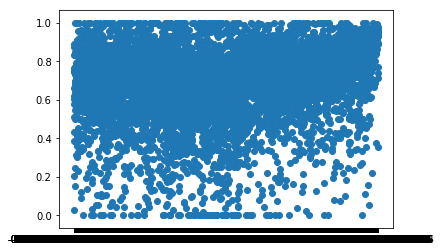

In [29]:
plt.scatter(principalDf,y)

In [35]:
# Import necessary modules

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

In [37]:
# Create training and test sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [38]:
# Create the regressor: reg_all

reg_all = LinearRegression()

In [39]:
# Fit the regressor to the training data

reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
# Predict on the test data: y_pred

y_pred = reg_all.predict(X_test)

 

# Compute and print R^2 and RMSE

print("R^2: {}".format(reg_all.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.14344831952866588
Root Mean Squared Error: 0.17576847970333323


ValueError: x and y must be the same size

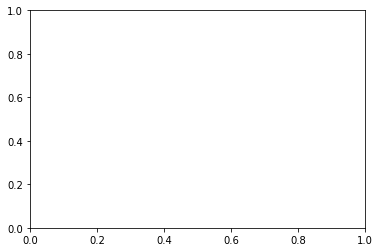

In [43]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()